In [217]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import time

df = pd.read_excel (r'RealEstate.xlsx')
no = pd.DataFrame(df, columns= ['X1 transaction date'])


## Preproccesing Excel Data

In [218]:
df.reset_index().values
no = df['No'].to_numpy(np.float64)
x1 = df['X1 transaction date'].to_numpy(np.float64)
x2 = df['X2 house age'].to_numpy(np.float64)
x3 = df['X3 distance to the nearest MRT station'].to_numpy(np.float64)
x4 = df['X4 number of convenience stores'].to_numpy(np.float64)
x5 = df['X5 latitude'].to_numpy(np.float64)
x6 = df['X6 longitude'].to_numpy(np.float64)
y = df['Y house price of unit area'].to_numpy(np.float64)
y = y.reshape(len(y),1)
y.shape

(414, 1)

In [219]:
dataArr = np.empty([0,6])

for i in range(len(x1)):
    row = np.array([x1[i],x2[i],x3[i],x4[i],x5[i],x6[i]])
    dataArr = np.append(dataArr,np.array([row]),axis=0)
         
dataArr.shape

(414, 6)

In [221]:
## Scaling Output
scaler = MinMaxScaler((0, 1))
y_shape = y.shape
y = scaler.fit_transform(y.reshape(-1, 1))
y = y.reshape(y_shape)

In [222]:
x_train, x_test, y_train, y_test = train_test_split(dataArr, y, test_size=114, random_state=42) 

In [223]:
## applying scaling to inputs

x_train_shape = x_train.shape
x_train = scaler.fit_transform(x_train.reshape(-1, 1))
x_train = x_train.reshape(x_train_shape)

x_test_shape = x_test.shape
x_test = scaler.transform(x_test.reshape(-1, 1))
x_test = x_test.reshape(x_test_shape)

## Creating NN

In [224]:
import torch
from torch.autograd import Variable
import torch.nn.functional as F
import torch.utils.data as Data
import matplotlib.pyplot as plt


In [225]:
x_train.shape

(300, 6)

In [226]:
## Scaled Output NN

inputs = 6
firstLayer = 60
output = 1

net = torch.nn.Sequential(
        torch.nn.Linear(inputs, firstLayer),
        torch.nn.Sigmoid(),
        torch.nn.Linear(firstLayer, output),
        )

In [227]:
optimizer = torch.optim.Adam(net.parameters(), lr=0.1)#lr of 1
loss_func = torch.nn.MSELoss(reduction='mean')  # this is for regression mean squared loss ---> can change to sum. Is mean currently

BATCH_SIZE = 150#len(x_train) #50 #40 
EPOCH = 1000 #40 #200

x_train = torch.from_numpy(x_train).float().detach()
y_train = torch.from_numpy(y_train).float()


torch_dataset = Data.TensorDataset(x_train, y_train)

x_train = x_train.float()
y_train = y_train.float()

loader = Data.DataLoader(
    dataset=torch_dataset, 
    batch_size=BATCH_SIZE, 
    shuffle=True, num_workers=2,)

error at epoch  0 is  tensor(0.2604, grad_fn=<MseLossBackward>)
error at epoch  0 is  tensor(7.4742, grad_fn=<MseLossBackward>)
error at epoch  1 is  tensor(0.6486, grad_fn=<MseLossBackward>)
error at epoch  1 is  tensor(1.1660, grad_fn=<MseLossBackward>)
error at epoch  2 is  tensor(3.3386, grad_fn=<MseLossBackward>)
error at epoch  2 is  tensor(2.7344, grad_fn=<MseLossBackward>)
error at epoch  3 is  tensor(0.9905, grad_fn=<MseLossBackward>)
error at epoch  3 is  tensor(0.0629, grad_fn=<MseLossBackward>)
error at epoch  4 is  tensor(0.2446, grad_fn=<MseLossBackward>)
error at epoch  4 is  tensor(0.8740, grad_fn=<MseLossBackward>)
error at epoch  5 is  tensor(1.2162, grad_fn=<MseLossBackward>)
error at epoch  5 is  tensor(1.1173, grad_fn=<MseLossBackward>)
error at epoch  6 is  tensor(0.6627, grad_fn=<MseLossBackward>)
error at epoch  6 is  tensor(0.2723, grad_fn=<MseLossBackward>)
error at epoch  7 is  tensor(0.0444, grad_fn=<MseLossBackward>)
error at epoch  7 is  tensor(0.0342, gra

error at epoch  64 is  tensor(0.0106, grad_fn=<MseLossBackward>)
error at epoch  64 is  tensor(0.0072, grad_fn=<MseLossBackward>)
error at epoch  65 is  tensor(0.0101, grad_fn=<MseLossBackward>)
error at epoch  65 is  tensor(0.0077, grad_fn=<MseLossBackward>)
error at epoch  66 is  tensor(0.0066, grad_fn=<MseLossBackward>)
error at epoch  66 is  tensor(0.0112, grad_fn=<MseLossBackward>)
error at epoch  67 is  tensor(0.0076, grad_fn=<MseLossBackward>)
error at epoch  67 is  tensor(0.0100, grad_fn=<MseLossBackward>)
error at epoch  68 is  tensor(0.0079, grad_fn=<MseLossBackward>)
error at epoch  68 is  tensor(0.0097, grad_fn=<MseLossBackward>)
error at epoch  69 is  tensor(0.0098, grad_fn=<MseLossBackward>)
error at epoch  69 is  tensor(0.0078, grad_fn=<MseLossBackward>)
error at epoch  70 is  tensor(0.0107, grad_fn=<MseLossBackward>)
error at epoch  70 is  tensor(0.0068, grad_fn=<MseLossBackward>)
error at epoch  71 is  tensor(0.0086, grad_fn=<MseLossBackward>)
error at epoch  71 is  te

error at epoch  127 is  tensor(0.0093, grad_fn=<MseLossBackward>)
error at epoch  127 is  tensor(0.0069, grad_fn=<MseLossBackward>)
error at epoch  128 is  tensor(0.0091, grad_fn=<MseLossBackward>)
error at epoch  128 is  tensor(0.0071, grad_fn=<MseLossBackward>)
error at epoch  129 is  tensor(0.0067, grad_fn=<MseLossBackward>)
error at epoch  129 is  tensor(0.0094, grad_fn=<MseLossBackward>)
error at epoch  130 is  tensor(0.0091, grad_fn=<MseLossBackward>)
error at epoch  130 is  tensor(0.0071, grad_fn=<MseLossBackward>)
error at epoch  131 is  tensor(0.0067, grad_fn=<MseLossBackward>)
error at epoch  131 is  tensor(0.0095, grad_fn=<MseLossBackward>)
error at epoch  132 is  tensor(0.0069, grad_fn=<MseLossBackward>)
error at epoch  132 is  tensor(0.0093, grad_fn=<MseLossBackward>)
error at epoch  133 is  tensor(0.0063, grad_fn=<MseLossBackward>)
error at epoch  133 is  tensor(0.0099, grad_fn=<MseLossBackward>)
error at epoch  134 is  tensor(0.0070, grad_fn=<MseLossBackward>)
error at e

error at epoch  190 is  tensor(0.0093, grad_fn=<MseLossBackward>)
error at epoch  190 is  tensor(0.0067, grad_fn=<MseLossBackward>)
error at epoch  191 is  tensor(0.0058, grad_fn=<MseLossBackward>)
error at epoch  191 is  tensor(0.0103, grad_fn=<MseLossBackward>)
error at epoch  192 is  tensor(0.0064, grad_fn=<MseLossBackward>)
error at epoch  192 is  tensor(0.0096, grad_fn=<MseLossBackward>)
error at epoch  193 is  tensor(0.0057, grad_fn=<MseLossBackward>)
error at epoch  193 is  tensor(0.0103, grad_fn=<MseLossBackward>)
error at epoch  194 is  tensor(0.0084, grad_fn=<MseLossBackward>)
error at epoch  194 is  tensor(0.0076, grad_fn=<MseLossBackward>)
error at epoch  195 is  tensor(0.0103, grad_fn=<MseLossBackward>)
error at epoch  195 is  tensor(0.0057, grad_fn=<MseLossBackward>)
error at epoch  196 is  tensor(0.0072, grad_fn=<MseLossBackward>)
error at epoch  196 is  tensor(0.0088, grad_fn=<MseLossBackward>)
error at epoch  197 is  tensor(0.0054, grad_fn=<MseLossBackward>)
error at e

error at epoch  253 is  tensor(0.0093, grad_fn=<MseLossBackward>)
error at epoch  253 is  tensor(0.0066, grad_fn=<MseLossBackward>)
error at epoch  254 is  tensor(0.0097, grad_fn=<MseLossBackward>)
error at epoch  254 is  tensor(0.0062, grad_fn=<MseLossBackward>)
error at epoch  255 is  tensor(0.0079, grad_fn=<MseLossBackward>)
error at epoch  255 is  tensor(0.0080, grad_fn=<MseLossBackward>)
error at epoch  256 is  tensor(0.0068, grad_fn=<MseLossBackward>)
error at epoch  256 is  tensor(0.0092, grad_fn=<MseLossBackward>)
error at epoch  257 is  tensor(0.0065, grad_fn=<MseLossBackward>)
error at epoch  257 is  tensor(0.0094, grad_fn=<MseLossBackward>)
error at epoch  258 is  tensor(0.0086, grad_fn=<MseLossBackward>)
error at epoch  258 is  tensor(0.0073, grad_fn=<MseLossBackward>)
error at epoch  259 is  tensor(0.0087, grad_fn=<MseLossBackward>)
error at epoch  259 is  tensor(0.0072, grad_fn=<MseLossBackward>)
error at epoch  260 is  tensor(0.0085, grad_fn=<MseLossBackward>)
error at e

error at epoch  316 is  tensor(0.0066, grad_fn=<MseLossBackward>)
error at epoch  316 is  tensor(0.0092, grad_fn=<MseLossBackward>)
error at epoch  317 is  tensor(0.0072, grad_fn=<MseLossBackward>)
error at epoch  317 is  tensor(0.0085, grad_fn=<MseLossBackward>)
error at epoch  318 is  tensor(0.0067, grad_fn=<MseLossBackward>)
error at epoch  318 is  tensor(0.0091, grad_fn=<MseLossBackward>)
error at epoch  319 is  tensor(0.0063, grad_fn=<MseLossBackward>)
error at epoch  319 is  tensor(0.0096, grad_fn=<MseLossBackward>)
error at epoch  320 is  tensor(0.0068, grad_fn=<MseLossBackward>)
error at epoch  320 is  tensor(0.0090, grad_fn=<MseLossBackward>)
error at epoch  321 is  tensor(0.0051, grad_fn=<MseLossBackward>)
error at epoch  321 is  tensor(0.0106, grad_fn=<MseLossBackward>)
error at epoch  322 is  tensor(0.0060, grad_fn=<MseLossBackward>)
error at epoch  322 is  tensor(0.0097, grad_fn=<MseLossBackward>)
error at epoch  323 is  tensor(0.0058, grad_fn=<MseLossBackward>)
error at e

error at epoch  379 is  tensor(0.0100, grad_fn=<MseLossBackward>)
error at epoch  379 is  tensor(0.0056, grad_fn=<MseLossBackward>)
error at epoch  380 is  tensor(0.0059, grad_fn=<MseLossBackward>)
error at epoch  380 is  tensor(0.0097, grad_fn=<MseLossBackward>)
error at epoch  381 is  tensor(0.0090, grad_fn=<MseLossBackward>)
error at epoch  381 is  tensor(0.0065, grad_fn=<MseLossBackward>)
error at epoch  382 is  tensor(0.0059, grad_fn=<MseLossBackward>)
error at epoch  382 is  tensor(0.0097, grad_fn=<MseLossBackward>)
error at epoch  383 is  tensor(0.0109, grad_fn=<MseLossBackward>)
error at epoch  383 is  tensor(0.0046, grad_fn=<MseLossBackward>)
error at epoch  384 is  tensor(0.0087, grad_fn=<MseLossBackward>)
error at epoch  384 is  tensor(0.0069, grad_fn=<MseLossBackward>)
error at epoch  385 is  tensor(0.0076, grad_fn=<MseLossBackward>)
error at epoch  385 is  tensor(0.0080, grad_fn=<MseLossBackward>)
error at epoch  386 is  tensor(0.0092, grad_fn=<MseLossBackward>)
error at e

error at epoch  442 is  tensor(0.0070, grad_fn=<MseLossBackward>)
error at epoch  442 is  tensor(0.0083, grad_fn=<MseLossBackward>)
error at epoch  443 is  tensor(0.0092, grad_fn=<MseLossBackward>)
error at epoch  443 is  tensor(0.0061, grad_fn=<MseLossBackward>)
error at epoch  444 is  tensor(0.0093, grad_fn=<MseLossBackward>)
error at epoch  444 is  tensor(0.0060, grad_fn=<MseLossBackward>)
error at epoch  445 is  tensor(0.0052, grad_fn=<MseLossBackward>)
error at epoch  445 is  tensor(0.0101, grad_fn=<MseLossBackward>)
error at epoch  446 is  tensor(0.0056, grad_fn=<MseLossBackward>)
error at epoch  446 is  tensor(0.0097, grad_fn=<MseLossBackward>)
error at epoch  447 is  tensor(0.0065, grad_fn=<MseLossBackward>)
error at epoch  447 is  tensor(0.0088, grad_fn=<MseLossBackward>)
error at epoch  448 is  tensor(0.0080, grad_fn=<MseLossBackward>)
error at epoch  448 is  tensor(0.0072, grad_fn=<MseLossBackward>)
error at epoch  449 is  tensor(0.0047, grad_fn=<MseLossBackward>)
error at e

error at epoch  505 is  tensor(0.0067, grad_fn=<MseLossBackward>)
error at epoch  505 is  tensor(0.0083, grad_fn=<MseLossBackward>)
error at epoch  506 is  tensor(0.0094, grad_fn=<MseLossBackward>)
error at epoch  506 is  tensor(0.0056, grad_fn=<MseLossBackward>)
error at epoch  507 is  tensor(0.0053, grad_fn=<MseLossBackward>)
error at epoch  507 is  tensor(0.0097, grad_fn=<MseLossBackward>)
error at epoch  508 is  tensor(0.0063, grad_fn=<MseLossBackward>)
error at epoch  508 is  tensor(0.0087, grad_fn=<MseLossBackward>)
error at epoch  509 is  tensor(0.0081, grad_fn=<MseLossBackward>)
error at epoch  509 is  tensor(0.0069, grad_fn=<MseLossBackward>)
error at epoch  510 is  tensor(0.0088, grad_fn=<MseLossBackward>)
error at epoch  510 is  tensor(0.0062, grad_fn=<MseLossBackward>)
error at epoch  511 is  tensor(0.0064, grad_fn=<MseLossBackward>)
error at epoch  511 is  tensor(0.0086, grad_fn=<MseLossBackward>)
error at epoch  512 is  tensor(0.0071, grad_fn=<MseLossBackward>)
error at e

error at epoch  568 is  tensor(0.0061, grad_fn=<MseLossBackward>)
error at epoch  568 is  tensor(0.0085, grad_fn=<MseLossBackward>)
error at epoch  569 is  tensor(0.0082, grad_fn=<MseLossBackward>)
error at epoch  569 is  tensor(0.0066, grad_fn=<MseLossBackward>)
error at epoch  570 is  tensor(0.0086, grad_fn=<MseLossBackward>)
error at epoch  570 is  tensor(0.0060, grad_fn=<MseLossBackward>)
error at epoch  571 is  tensor(0.0094, grad_fn=<MseLossBackward>)
error at epoch  571 is  tensor(0.0053, grad_fn=<MseLossBackward>)
error at epoch  572 is  tensor(0.0081, grad_fn=<MseLossBackward>)
error at epoch  572 is  tensor(0.0065, grad_fn=<MseLossBackward>)
error at epoch  573 is  tensor(0.0100, grad_fn=<MseLossBackward>)
error at epoch  573 is  tensor(0.0049, grad_fn=<MseLossBackward>)
error at epoch  574 is  tensor(0.0091, grad_fn=<MseLossBackward>)
error at epoch  574 is  tensor(0.0056, grad_fn=<MseLossBackward>)
error at epoch  575 is  tensor(0.0077, grad_fn=<MseLossBackward>)
error at e

error at epoch  631 is  tensor(0.0061, grad_fn=<MseLossBackward>)
error at epoch  631 is  tensor(0.0082, grad_fn=<MseLossBackward>)
error at epoch  632 is  tensor(0.0058, grad_fn=<MseLossBackward>)
error at epoch  632 is  tensor(0.0084, grad_fn=<MseLossBackward>)
error at epoch  633 is  tensor(0.0054, grad_fn=<MseLossBackward>)
error at epoch  633 is  tensor(0.0089, grad_fn=<MseLossBackward>)
error at epoch  634 is  tensor(0.0078, grad_fn=<MseLossBackward>)
error at epoch  634 is  tensor(0.0065, grad_fn=<MseLossBackward>)
error at epoch  635 is  tensor(0.0057, grad_fn=<MseLossBackward>)
error at epoch  635 is  tensor(0.0086, grad_fn=<MseLossBackward>)
error at epoch  636 is  tensor(0.0073, grad_fn=<MseLossBackward>)
error at epoch  636 is  tensor(0.0070, grad_fn=<MseLossBackward>)
error at epoch  637 is  tensor(0.0083, grad_fn=<MseLossBackward>)
error at epoch  637 is  tensor(0.0060, grad_fn=<MseLossBackward>)
error at epoch  638 is  tensor(0.0081, grad_fn=<MseLossBackward>)
error at e

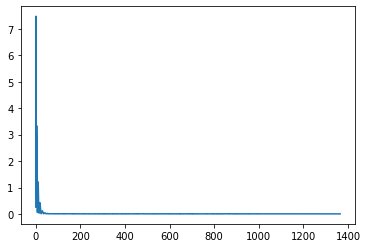

In [228]:
## Pytorch Grad Descent 

loss_graph = torch.empty(0)
start_time = time.perf_counter()
for epoch in range(EPOCH):
    for step, (batch_x, batch_y) in enumerate(loader): # for each training step
        
        b_x = Variable(batch_x,requires_grad=False)
        b_y = Variable(batch_y)

        y_pred = net(b_x.float())     # input x and predict based on x
        
#         loss =  loss_func(y_pred, b_y)     # must be (1. nn output, 2. target)
#         loss_graph = torch.cat((loss_graph, loss.detach().flatten()),0)
        
        ##Scaled Output Change
#         loss1 =  loss_func(torch.from_numpy(scaler.inverse_transform(y_pred.detach().numpy())), torch.from_numpy(scaler.inverse_transform(b_y.detach().numpy()))) 
        loss =  loss_func(y_pred, b_y) 
        loss_graph = torch.cat((loss_graph, loss.detach().flatten()),0) 
        print("error at epoch ",epoch,"is ",loss)

#         print("epoch: ",epoch," loss: ",loss.detach().numpy())
        optimizer.zero_grad()   # clear gradients for next train
        loss.backward()         # backpropagation, compute gradients
        optimizer.step()        # apply gradients

    if ((loss_graph[2*epoch+1]+loss_graph[2*epoch])/2 <0.007):
        break
        
print("time taken to execute: ",time.perf_counter()-start_time)
plt.plot(loss_graph.numpy()) 


In [233]:
##LM 

# loss_graph = torch.empty(0)
# u=0.1 #beta multiply identity matrix
# b = 10
# V_prev = 0 #intialise performance index
# start_time = time.perf_counter()
# for epoch in range(EPOCH):
#     for step, (batch_x, batch_y) in enumerate(loader): # for each training step
        
#         b_x = Variable(batch_x,requires_grad=False)
#         b_y = batch_y.float()
#         y_pred = net(b_x)     # predict outputs based on x
# #         num_param = inputs*firstLayer+firstLayer+firstLayer*secondLayer+secondLayer+secondLayer*output+output
#         num_param = inputs*firstLayer+firstLayer+firstLayer*output+output
# #         num_param = inputs*firstLayer+firstLayer+firstLayer*secondLayer+secondLayer+secondLayer*thirdLayer+thirdLayer+ thirdLayer*output+output
        
#         jacobian = torch.empty(len(batch_y), num_param) # errors by weights

#         for n in range(len(batch_y)): #batch length is num of rows
#             net.zero_grad()
#             e = b_y[n]-y_pred[n]
#             e.backward(retain_graph=True)
# #             gradients=torch.autograd.grad(e, net.parameters(), create_graph=True)
# #             print(gradients.shape)
#             with torch.no_grad():
#                 param_grads = torch.empty(0) 

#                 for param in net.parameters():
#                     param_grads = torch.cat((param_grads, torch.flatten(param.grad).detach()),0) #puts gradient of params w.r.t e

#                 for m in range(num_param): #num params is num of coloumns
#                     jacobian[n][m] = param_grads[m]
#         with torch.no_grad():
#             #determine dParam  
#             V_current = 0.5*torch.sum(torch.square(b_y-y_pred)) #performance index
            
# #             print("V: ",V_current, "u is: ",u)
#             dParam = torch.matmul(torch.matmul(torch.inverse(torch.matmul(torch.transpose(jacobian,-1,0),jacobian) + u*torch.eye(num_param, num_param)),torch.transpose(jacobian,-1,0)),b_y-y_pred)
#             if(V_current > V_prev):
#                 u *= b
#             else:
#                 u /= b
#             V_prev = V_current
        


#             loss =  loss_func(y_pred, b_y) 
#             loss_graph = torch.cat((loss_graph, loss.detach().flatten()),0) 
#             print("error at epoch ",epoch,"is ",loss)

#             #update the params
#             c = 0
#         with torch.no_grad():    
#             for param in net.parameters():
#                 s = param.shape
#                 dParamUpdate = dParam[c:c+len(param.flatten())]
#                 c+= len(dParamUpdate)
#                 param -= 1*dParamUpdate.reshape(s)

            
    
#     if ((loss_graph[2*epoch+1]+loss_graph[2*epoch])/2 <0.007):
#         break
    
# print("time taken to execute: ",time.perf_counter()-start_time)   
# plt.plot(loss_graph.numpy())  

In [234]:
y_test.dtype

dtype('float64')

In [235]:
x_test = torch.from_numpy(x_test).float()
y_test = torch.from_numpy(y_test).float()
y_pred = net(x_test)
y_pred.dtype

torch.float32

In [236]:
y_test = y_test.numpy()
y_pred = y_pred.detach().numpy()

## Plotting

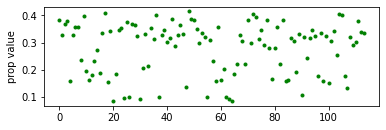

In [239]:
## Scaled Output

plt.subplot(2,1,1)


plt.plot(y_pred,'g.', y_train,'r.')

plt.ylabel('prop value')
plt.show()

# loss = torch.empty(len(y_test)) 
loss = torch.empty(len(y_test)).numpy() 

c=0;
for i in range(len(y_test)):
    loss[i] = abs(y_test[i]-y_pred[i])
    if loss[i] > (y_test[i]*0.1):
        c=c+1
#         print("Error ", c ,"is ", loss[i], "correct was",y_test[i],"predicted was ",y_pred[i])


# plt.subplot(2,1,2)
# plt.plot(loss,'bo')
# print("avg loss was", loss.sum()/len(loss)," avg val is",y_test.sum()/len(y_test))
# print("Minimum val is",min(y_test))
# print("Test set length: ",len(y_test)," % of prdeictions within 10%: ",100-c/len(y_test)*100)

In [240]:
MSE = (np.square(loss))
print("MSE Mean: ",np.mean(MSE))
print("MSE STD Dev: ",np.std(MSE))

MSE Mean:  0.005930012
MSE STD Dev:  0.013301724
